In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
## Will: Try to load data from text file into a dataframe directly
import pandas as pd
import numpy as np

merged_output_path = '/content/drive/My Drive/Call Options Alert System/merged_output.txt'

df = pd.read_csv(merged_output_path, header=0)

<ipython-input-2-58e3394fd628>:7: DtypeWarning: Columns (0,3,4,6,7,8,9,10,11,12,15,17,18,19,20,21,23,24,25,26,27,28,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(merged_output_path, header=0)


In [3]:
df.head()

,[QUOTE_UNIXTIME],[QUOTE_READTIME],[QUOTE_DATE],[QUOTE_TIME_HOURS],[UNDERLYING_LAST],[EXPIRE_DATE],[EXPIRE_UNIX],[DTE],[C_DELTA],[C_GAMMA],...,[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],[P_VOLUME],[STRIKE_DISTANCE],[STRIKE_DISTANCE_PCT]
0,1633118400,2021-10-01 16:00,2021-10-01,16.0,142.6,2021-10-01,1633118400,0.0,0.88841,0.00023,...,0.01,-0.00018,0.00008,-0.00007,-0.00503,0.0,4.590700,1.000000,67.6,0.474
1,1633118400,2021-10-01 16:00,2021-10-01,16.0,142.6,2021-10-01,1633118400,0.0,1.0,0.0,...,0.01,-0.00028,0.00013,-0.00027,-0.00492,0.0,4.153230,5.000000,62.6,0.439
2,1633118400,2021-10-01 16:00,2021-10-01,16.0,142.6,2021-10-01,1633118400,0.0,0.89548,0.00072,...,0.01,-0.00054,0.00008,0.00003,-0.00456,0.0,3.741720,1.000000,57.6,0.404
3,1633118400,2021-10-01 16:00,2021-10-01,16.0,142.6,2021-10-01,1633118400,0.0,1.0,0.0,...,0.01,-0.00054,0.00012,0.00067,-0.00536,0.0,3.353240,8.000000,52.6,0.369
4,1633118400,2021-10-01 16:00,2021-10-01,16.0,142.6,2021-10-01,1633118400,0.0,1.0,0.0,...,0.01,-0.00078,0.00018,0.00005,-0.00512,0.0,2.982720,10.000000,47.6,0.334


In [4]:
## Will: Basic Cleaning

# Clean the column name
col_replace = dict((col, col.replace("[", "").replace("]", "").strip()) for col in df.columns)
df = df.rename(columns=col_replace)

# Replace space only strings with NaN
df = df.replace(r"^\s*$", np.nan, regex=True)

# Drop duplicates
print(f"Total rows: {len(df)}")
print(f"Rows of duplicates: {df.duplicated().sum()}")
df = df.drop_duplicates(ignore_index=True)
print(f"Total rows after removing duplicates: {len(df)}")

Total rows: 1439715
Rows of duplicates: 76
Total rows after removing duplicates: 1439639


In [5]:
df.isna().sum()  ## Will:  Next we need to decide how to process NaNs, we can either drop or interpolate.

QUOTE_UNIXTIME              0
QUOTE_READTIME              0
QUOTE_DATE                  0
QUOTE_TIME_HOURS            0
UNDERLYING_LAST             0
EXPIRE_DATE                 0
EXPIRE_UNIX                 0
DTE                         0
C_DELTA                    16
C_GAMMA                    16
C_VEGA                     16
C_THETA                    16
C_RHO                      16
C_IV                    91610
C_VOLUME               342625
C_LAST                   1408
C_SIZE                      0
C_BID                    1409
C_ASK                    1409
STRIKE                      0
P_BID                    1417
P_ASK                    1419
P_SIZE                      0
P_LAST                   1416
P_DELTA                    16
P_GAMMA                    16
P_VEGA                     16
P_THETA                    16
P_RHO                      16
P_IV                   104104
P_VOLUME               394045
STRIKE_DISTANCE             0
STRIKE_DISTANCE_PCT         0
dtype: int

In [16]:
# Remove rows where either 'C_VOLUME' or 'P_VOLUME' is NaN
df = df.dropna(subset=['C_VOLUME', 'P_VOLUME', 'C_IV', 'P_IV', 'P_BID','P_ASK'])


# Reset the index after removing rows
df.reset_index(drop=True, inplace=True)

df.isna().sum()


QUOTE_UNIXTIME         0
QUOTE_READTIME         0
QUOTE_DATE             0
QUOTE_TIME_HOURS       0
UNDERLYING_LAST        0
EXPIRE_DATE            0
EXPIRE_UNIX            0
DTE                    0
C_DELTA                0
C_GAMMA                0
C_VEGA                 0
C_THETA                0
C_RHO                  0
C_IV                   0
C_VOLUME               0
C_LAST                 0
C_SIZE                 0
C_BID                  0
C_ASK                  0
STRIKE                 0
P_BID                  0
P_ASK                  0
P_SIZE                 0
P_LAST                 0
P_DELTA                0
P_GAMMA                0
P_VEGA                 0
P_THETA                0
P_RHO                  0
P_IV                   0
P_VOLUME               0
STRIKE_DISTANCE        0
STRIKE_DISTANCE_PCT    0
dtype: int64

In [18]:
# Count the total number of rows
total_rows = df.shape[0]

# Determine the size of the table (rows, columns)
table_size = df.shape

print("Total number of rows:", total_rows)
print("Size of the table (rows, columns):", table_size)

Total rows: 811609
Total number of rows: 811609
Size of the table (rows, columns): (811609, 33)


In [19]:
df.head()

,QUOTE_UNIXTIME,QUOTE_READTIME,QUOTE_DATE,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,...,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT
0,1633118400,2021-10-01 16:00,2021-10-01,16.0,142.6,2021-10-01,1633118400,0.0,0.88841,0.00023,...,0.01,-0.00018,0.00008,-0.00007,-0.00503,0.0,4.590700,1.000000,67.6,0.474
1,1633118400,2021-10-01 16:00,2021-10-01,16.0,142.6,2021-10-01,1633118400,0.0,0.89548,0.00072,...,0.01,-0.00054,0.00008,0.00003,-0.00456,0.0,3.741720,1.000000,57.6,0.404
2,1633118400,2021-10-01 16:00,2021-10-01,16.0,142.6,2021-10-01,1633118400,0.0,0.00667,0.00916,...,5.42,-0.92449,0.03891,0.00885,-0.12505,-0.00306,0.575420,802.000000,5.4,0.038
3,1633118400,2021-10-01 16:00,2021-10-01,16.0,142.6,2021-10-01,1633118400,0.0,0.00576,0.00707,...,6.48,-0.96414,0.02269,0.00499,-0.05003,-0.00301,0.540850,247.000000,6.4,0.045
4,1633118400,2021-10-01 16:00,2021-10-01,16.0,142.6,2021-10-01,1633118400,0.0,0.00362,0.00252,...,12.35,-0.97813,0.00902,0.00306,-0.0497,-0.00285,0.919820,78.000000,12.4,0.087


In [20]:
df.describe()

,QUOTE_UNIXTIME,QUOTE_READTIME,QUOTE_DATE,QUOTE_TIME_HOURS,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,DTE,C_DELTA,C_GAMMA,...,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT
count,811609,811609,811609,811609,811609,811609,811609,811609,811609,811609,...,811609,811609,811609,811609,811609,811609,811609,811609,811609,811609
unique,1660,1635,1635,3,1575,372,514,2930,163427,14046,...,17747,163052,14090,170815,47042,216042,104664,6904,5410,2418
top,1598558400,2020-08-27 16:00,2020-08-27,16.000000,142.570000,2022-06-17,1655496000,17.000000,1.000000,0.000000,...,0.010000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000380,0.000000,5.000000,0.059000
freq,1051,1051,1051,662168,2182,38281,29667,7163,9951,13195,...,24259,7295,13169,5620,7353,22683,137,181045,2119,2162


In [25]:
import pandas as pd

# Assuming 'df' is your DataFrame
data_types = df.dtypes

print(data_types)


QUOTE_UNIXTIME                 object
QUOTE_READTIME                 object
QUOTE_DATE             datetime64[ns]
QUOTE_TIME_HOURS               object
UNDERLYING_LAST                object
EXPIRE_DATE                    object
EXPIRE_UNIX                    object
DTE                            object
C_DELTA                        object
C_GAMMA                        object
C_VEGA                         object
C_THETA                        object
C_RHO                          object
C_IV                           object
C_VOLUME                       object
C_LAST                        float64
C_SIZE                         object
C_BID                          object
C_ASK                          object
STRIKE                         object
P_BID                          object
P_ASK                          object
P_SIZE                         object
P_LAST                         object
P_DELTA                        object
P_GAMMA                        object
P_VEGA      

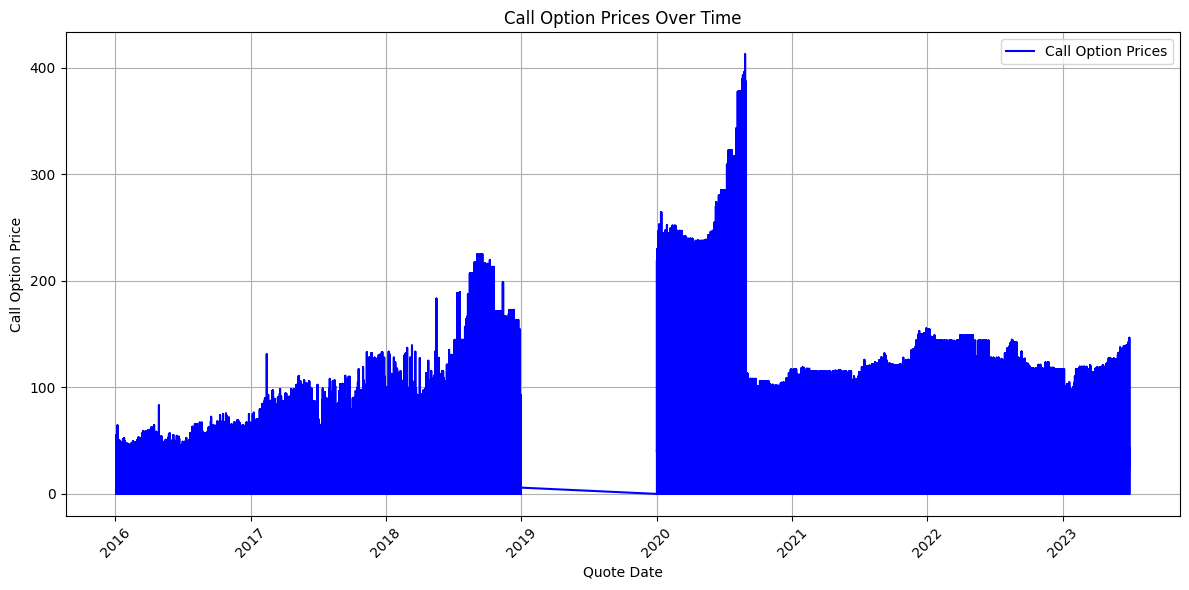

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'QUOTE_DATE' and 'C_LAST' columns

# Convert 'QUOTE_DATE' to a pandas datetime object with error handling
df['QUOTE_DATE'] = pd.to_datetime(df['QUOTE_DATE'], format='%Y-%m-%d', errors='coerce')

# Remove rows with NaT (invalid date) values
df = df.dropna(subset=['QUOTE_DATE'])

# Ensure 'C_LAST' column contains numeric values (convert if needed)
df['C_LAST'] = pd.to_numeric(df['C_LAST'], errors='coerce')

# Remove rows with non-numeric 'C_LAST' values
df = df.dropna(subset=['C_LAST'])

# Sort the DataFrame by 'QUOTE_DATE'
df.sort_values(by='QUOTE_DATE', inplace=True)

# Create the plot for call option prices
plt.figure(figsize=(12, 6))  # Set the figure size

# Plot call option prices
plt.plot(df['QUOTE_DATE'], df['C_LAST'], label='Call Option Prices', color='blue')

# Customize the plot
plt.title('Call Option Prices Over Time')
plt.xlabel('Quote Date')
plt.ylabel('Call Option Price')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd

# Assuming 'df' is your DataFrame
data_types = df.dtypes

print(data_types)


QUOTE_UNIXTIME                 object
QUOTE_READTIME                 object
QUOTE_DATE             datetime64[ns]
QUOTE_TIME_HOURS               object
UNDERLYING_LAST                object
EXPIRE_DATE                    object
EXPIRE_UNIX                    object
DTE                            object
C_DELTA                        object
C_GAMMA                        object
C_VEGA                         object
C_THETA                        object
C_RHO                          object
C_IV                           object
C_VOLUME                       object
C_LAST                        float64
C_SIZE                         object
C_BID                          object
C_ASK                          object
STRIKE                         object
P_BID                          object
P_ASK                          object
P_SIZE                         object
P_LAST                         object
P_DELTA                        object
P_GAMMA                        object
P_VEGA      